# 2.1 Layer Implementations

In [2]:
from gradient_check import eval_numerical_gradient_array
import numpy as np
from layers import *
import matplotlib.pyplot as plt
import itertools
np.random.seed(1)

## 2.1.1 Fully-Connected (fc) Layer

In [3]:
# gradient checking: compare the analytical gradient with the numerical gradient
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, M))

out, cache = affine_forward(x, w, b)
grad = affine_backward(dout, cache)[1]
ngrad = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
print(grad)
print(ngrad)

[[ 1.59635206  1.82027559  1.75073669 -1.67966495]
 [-0.65790404 -1.11722614 -0.78293679  0.87724857]
 [-0.19335814  1.88830625  0.14074812 -0.85950789]]
[[ 1.59635206  1.82027559  1.75073669 -1.67966495]
 [-0.65790404 -1.11722614 -0.78293679  0.87724857]
 [-0.19335814  1.88830625  0.14074812 -0.85950789]]


## 2.1.2 Activation Functions

In [4]:
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, D))

out, cache = relu_forward(x)
grad = relu_backward(dout, cache)
ngrad = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)
print(grad)
print(ngrad)

[[-0.22232814 -0.20075807  0.        ]
 [ 0.41005165  0.19829972  0.        ]]
[[-0.22232814 -0.20075807  0.        ]
 [ 0.41005165  0.19829972  0.        ]]


## 2.1.3 Softmax Loss

In [6]:
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, D))

num_classes, num_inputs = 5, 10
x = 0.001 * np.random.normal(size=(num_inputs, num_classes))
y = np.random.randint(num_classes, size=num_inputs)
y

ngrad = eval_numerical_gradient_array(lambda x: softmax_loss(x, y)[0], x, 1)
loss, grad = softmax_loss(x, y)
print(loss)
print(grad)
print(ngrad)

1.6095385571352077
[[ 0.01998923 -0.07996232  0.02000084  0.02001205  0.0199602 ]
 [ 0.02000241  0.0200209   0.0199899  -0.08001992  0.02000671]
 [ 0.02004772  0.01999957  0.01999535  0.01998805 -0.0800307 ]
 [ 0.01999598  0.0199936   0.02001463  0.0200082  -0.0800124 ]
 [ 0.02001311  0.01999206 -0.07999616  0.02002701  0.01996397]
 [ 0.02003246  0.0199911  -0.07998425  0.01997427  0.01998642]
 [ 0.02001705  0.02001423 -0.07998884  0.01999106  0.0199665 ]
 [ 0.0199957   0.0200136  -0.08000339  0.02001261  0.01998148]
 [ 0.01997468  0.01999529  0.0200194  -0.08001683  0.02002745]
 [ 0.02000979  0.0199853   0.02000751  0.02000262 -0.08000522]]
[[ 0.01998923 -0.07996232  0.02000084  0.02001205  0.0199602 ]
 [ 0.02000241  0.0200209   0.0199899  -0.08001992  0.02000671]
 [ 0.02004772  0.01999957  0.01999535  0.01998805 -0.0800307 ]
 [ 0.01999598  0.0199936   0.02001463  0.0200082  -0.0800124 ]
 [ 0.02001311  0.01999206 -0.07999616  0.02002701  0.01996397]
 [ 0.02003246  0.0199911  -0.079984

# 2.2 Two-layer Network

In [2]:
# TODO: put the path to your 'hw6_mds189', which should contain a 'trainval' and 'test' directory
path = '../mds189/trainval'
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_mds189
# load the dataset
debug = False  # OPTIONAL: you can change this to True for debugging *only*. Your reported results must be with debug = False
feat_train, label_train, feat_val, label_val = load_mds189(path,debug)
from solver import Solver
from classifiers.fc_net import FullyConnectedNet

In [4]:
import itertools

data = {
      'X_train': feat_train,
      'y_train': label_train,
      'X_val': feat_val,
      'y_val': label_val}

best_val = 0.0
best_model = None
best_combo = None

def train_model(combo):
    hd,lrd,ne,bs,lre,ws = combo
    model = FullyConnectedNet(input_dim=75,
                              hidden_dim=hd,
                              weight_scale=ws)
    solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                      'learning_rate': lre,
                    },
                    lr_decay=lrd,
                    num_epochs=ne, 
                    batch_size=bs,
                    verbose=False
                    #print_every=100
                   )
    solver.train()
    return solver
    
lr_decay = [0.95,0.99,1.0]
num_epochs = [10,15]
batch_size = [64,128,256]
learning_rate = [1e-4,1e-3,1e-2]
weight_scale = [1e-4,1e-3,1e-2]
hidden_dims = [[h] for h in [75,100,125]]

prog = 1
combos = [combo for combo in itertools.product\
(hidden_dims,lr_decay,num_epochs,batch_size,learning_rate,weight_scale)]
total = str(len(combos))

for combo in combos:
    model = train_model(combo)
    avg_val = np.mean(model.val_acc_history)
    if avg_val > best_val:
        best_val = avg_val
        best_model = model
        best_combo = combo
    print("\rfinished training model # "+str(prog)+"/"+total,end="")
    prog += 1

finished training model # 486/486

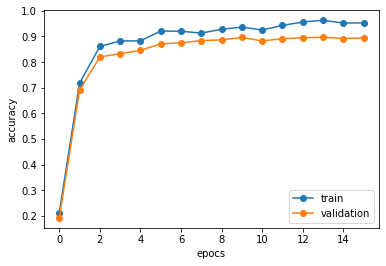

best model hyperparameters: ([125], 1.0, 15, 64, 0.0001, 0.01)
best model average train and validation accuracy: 0.8666875 0.8215104166666667


In [6]:
plt.plot(best_model.train_acc_history, '-o', label="train")
plt.plot(best_model.val_acc_history, '-o', label="validation")
plt.xlabel("epocs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print("best model hyperparameters: "+str(best_combo));
print("best model average train and validation accuracy:",\
      np.mean(best_model.train_acc_history),np.mean(best_model.val_acc_history))

# 2.3 Multi-layer Network

In [4]:
# TODO: put the path to your 'hw6_mds189', which should contain a 'trainval' and 'test' directory
path = '../mds189/trainval'
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_mds189
# load the dataset
debug = False  # OPTIONAL: you can change this to True for debugging *only*. Your reported results must be with debug = False
feat_train, label_train, feat_val, label_val = load_mds189(path,debug)
from solver import Solver
from classifiers.fc_net import FullyConnectedNet

In [2]:
import itertools

data = {
      'X_train': feat_train,
      'y_train': label_train,
      'X_val': feat_val,
      'y_val': label_val}

best_val = 0.0
best_model = None
best_combo = None

def train_model(combo):
    hd,lrd,ne,bs,lre,ws = combo
    model = FullyConnectedNet(input_dim=75,
                              hidden_dim=hd,
                              weight_scale=ws)
    solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                      'learning_rate': lre,
                    },
                    lr_decay=lrd,
                    num_epochs=ne, 
                    batch_size=bs,
                    verbose=False
                    #print_every=100
                   )
    solver.train()
    return solver
    
lr_decay = [0.95,0.99,1.0]
num_epochs = [10,15]
batch_size = [64,128,256]
learning_rate = [1e-4,1e-3,1e-2]
weight_scale = [1e-4,1e-3,1e-2]
hidden_dims = [[100]*i for i in range(1,5)]

prog = 1
combos = [combo for combo in itertools.product\
(hidden_dims,lr_decay,num_epochs,batch_size,learning_rate,weight_scale)]
total = str(len(combos))

for combo in combos:
    model = train_model(combo)
    avg_val = np.mean(model.val_acc_history)
    if avg_val > best_val:
        best_val = avg_val
        best_model = model
        best_combo = combo
    print("\rfinished training model # "+str(prog)+"/"+total,end="")
    prog += 1

finished training model # 648/648

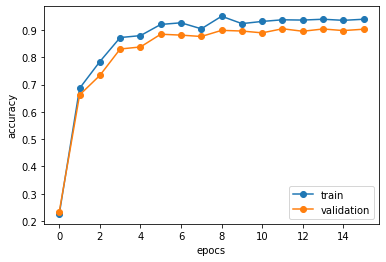

best model hyperparameters: ([100], 0.99, 15, 64, 0.0001, 0.01)
best model average train and validation accuracy: 0.8554375000000001 0.8202083333333333


In [6]:
plt.plot(best_model.train_acc_history, '-o', label="train")
plt.plot(best_model.val_acc_history, '-o', label="validation")
plt.xlabel("epocs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print("best model hyperparameters: "+str(best_combo));
print("best model average train and validation accuracy:",\
      np.mean(best_model.train_acc_history),np.mean(best_model.val_acc_history))